# Sentiment Analysis of Movie Reviews
### GA DSI-SG-26 Capstone
> By: Matthew Lio
---

Project notebook organisation:

1. Data Cleaning and EDA
2. Lexicon-based Models
3. Binary Classification ML Models (current notebook)
4. Deep Learning Models

# 3. Binary Classification with ML Models
---

### Contents:
- [Sentiment Analysis with Machine Learning](#Sentiment-Analysis-with-Machine-Learning)
- [Library and Data Imports](#Library-and-Data-Imports)
- [Train-test Split](#Train-test-Split)
- [Modeling Functions and Stopwords](#Modeling-Functions-and-Stopwords)
- [Logistic Regression](#Logistic-Regression)
- [Naive Bayes](#Naive-Bayes)
- [K-Nearest Neighbors](#K-Nearest-Neighbors)
- [AdaBoost](#AdaBoost)
- [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
- [XGBoost Classifier](#XGBoost-Classifier)
- [Decision Tree Classifier](#Decision-Tree-Classifier)
- [Extra Trees Classifier](#Extra-Trees-Classifier)
- [Random Forest Classifier](#Random-Forest-Classifier)
- [Model Evaluation](#Model-Evaluation)
- [Conclusion](#Conclusion)

## Sentiment Analysis with Machine Learning

In this notebook, we will explore using different machine learning models to solve sentiment analysis. We will train these machine learning models using different algorithms with our dataset, with the "sentiment" column as our sentiment polarity output (negative = 0, positive = 1).

### Evaluation Metrics

Evaluation of the models will be based on various evaluation metrics. More specifically, they are ROC-AUC, accuracy, and specificity. As our dataset is a balanced dataset, we will be tuning our models towards high ROC AUC.

#### ROC AUC
ROC AUC visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart. The higher TPR and lower FPR is for each threshold, the better it is. An overall ROC AUC score also describes the perfomance of our models. The higher the score, the more top-left our curve will be. ROC AUC is best used when our data is balanced, and if we care equally about positive and negative classes [[source]](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc). It is better than accuracy as accuracy is calculated based on **predicted classes** while ROC AUC is calculated based on **predicted scores**. This means that ROC AUC as the main metric will be the most precise in determining the performance of our model. During the evaluation at the last part, we will plot a ROC AUC curve to visualize all our models' performances.

#### Accuracy
Accuracy measures how many observations, both positive and negative, were correctly classified. As our dataset is balanced, and we care about both positive and negative classes, this is a good and easily interpretable metric for us to use. Correctly predicting positive reviews means that businesses would have more power in terms of product promotion or advertisements, while negative reviews provide insights for improvement. Even though it is less precise than ROC AUC since it measures based on predicted classes and not predicted scores, showing this metric is helpful to explain to non-technical stakeholders.

#### Specificity
Specificity is the last most important metric for us to evaluate. It is also called True Negative Rate (TNR), which refers to the probability of a correct negative prediction. It takes into account True Negative (TN) and False Positive (FP), where it is calculated by taking TN divided by total TN and FP. The reason we want to focus on correct predictions of negatives, is because in the real world, negative reviews may be more important than positive reviews in providing insights for improvement, suggestions and shortcomings, that may be invaluable to the growth of a business. In addition, if a product is good/becomes good, there will be lesser and lesser negative reviews. In that case, it is crucial for our model to still be robust in predicting all the negative reviews, out of the imbalanced datasets with lesser negative pool.

### Models
Following models will be used for our classification problem:
- Logistic Regression
- Multinomial Naive Bayes
- K-Nearest Neighbors Classifier
- AdaBoost Classifier
- Gradient Boosting Classifier
- XGBoost Classifier
- Decision Tree Classifier
- Extra Trees Classifier
- Random Forest Classifier

### Vectorizers
The 2 different transformers for each algorithm are:
- Count Vectorizer
- TF-IDF Vectorizer

## Library and Data Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import regex as re

import math
import matplotlib.ticker as mticker

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, 
accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve, average_precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance 

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline1

import warnings
import time
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 400

In [2]:
# import cleaned data
train = pd.read_csv('../data/train_cleaned.csv', index_col = 0)

In [3]:
train

,text,sentiment,rate
0,zero day lead you to think even re think why two boy young men would do what they did commit mutual suicide via slaughtering their classmates. it capture what must be beyond a bizarre mode of being for two human who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction. it is not a perfect movie but given what money time the filmmaker a...,1,10
1,word can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clich s mistake and all other negative thing you can imagine here that will just make you cry. to start with the technical first there are a lot of mistake regarding the airpl...,0,1
2,everyone play their part pretty well in this little nice movie . belushi get the chance to live part of his life differently but end up realizing that what he had going to be just a good or maybe even better. the movie show u that we ought to take advantage of the opportunity we have not the one we do not or cannot have. if u can get this movie on video for around it d be an investment,1,10
3,there are a lot of highly talented filmmaker actor in germany now. none of them are associated with this movie . why in the world do producer actually invest money in something like this this you could have made good film with the budget of this garbage it's not entertaining to have seven grown men running around a dwarf pretending to be funny. what is funny though is that the film's producer ...,0,1
4,i've just had the evidence that confirmed my suspicions. a bunch of kid to put on the dvd of titanic on a fantastic state of the art mega screen home entertainment type deal. only two of them had actually seen it before. but they all had seen the moment of kate leo and celine dion so many time that most of them felt they had seen the whole movie. shortly after the epic started they started to ...,0,2
...,...,...,...
24899,footlight parade released viewed . the ice cream cone is invented in new york. kevin after a long and busy break we hit another busby berkeley musical from warner bros. this time it's the ultra fast paced footlight parade starring james cagney a juggernaut stage producer chester kent. i am certain that cagney channeling berkeley with his performance of the irrepressible kent who to come up wit...,1,8
24900,deeply humorous yet honest comedy about a bunch of grownup bill paxton julie warner kevin pollak elizabeth perkins vincent spano matt craven and diane lane who are invited back to spend a week to tomawka a camp in ontario canada by their former consuelor alan arkin . writer director mike binder drew upon his experience at the same camp a the main source of creating a gentle and understanding y...,1,9
24901,st watched out of dir sydney pollack dvd version i watched titled day of the condor so so cia drama full of laid back performance making for a very laid back movie. the premise of the story revolves around out of member of a cia research group being killed with robert redford's character codename condor being the one that left. who killed them and why that's what redford try to find out while ...,0,4
24902,i watch lot of scary movie or at least they try to be and this to be the worst if not nd worst movie i have ever had to make myself try to sit through. i never knew the depth of masacism until i rented this piece of moldy cheese covered in a used latex contraceptive. i am a fan of julian sans but this is worse than i would hope for him. on the other hand the story promising and i intrigued...f...,0,2


In [4]:
# Checking for class imbalance
train['sentiment'].value_counts(normalize = True)

# Balanced data, no need to use SMOTE

1    0.500803
0    0.499197
Name: sentiment, dtype: float64

## Train-test Split

In [5]:
X = train['text']
y = train['sentiment']

In [6]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

## Modeling Functions and Stopwords

Functions include:

- running models
- retrieving relevant scores and metrics
- getting best parameters
- creating confusion matrices
- creating coefficient tables

In [7]:
# default stopwords list
stopwords = stopwords.words('english')

In [8]:
# Initializing list for roc comparison
gs_list = []

In [9]:
# lists to make into a summary dataframe later
estim_ls = []
trans_ls = []
train_auc_ls = []
test_auc_ls = []
acc_score_ls = []
speci_score_ls = []

In [10]:
# Instantiate transformers
transformer = {'cvec': CountVectorizer(),
               'tvec': TfidfVectorizer()
              }

In [11]:
# Instantiate models
models = {'lr': LogisticRegression(random_state = 42),
          'nb': MultinomialNB(),
          'knn': KNeighborsClassifier(),
          'ada': AdaBoostClassifier(random_state=42),
          'gb': GradientBoostingClassifier(random_state=42),
          'xgb': xgb.XGBClassifier(random_state=42),
          'dt': DecisionTreeClassifier(random_state = 42),
          'et': ExtraTreesClassifier(random_state = 42),
          'rf': RandomForestClassifier(random_state = 42)
        }

In [12]:
# Function to run model - input model and params
def run_model(trans, mod, trans_params={}, mod_params={}, grid_search=True):
    
    results = {}
    
    # ========== Run model: Pipeline and GridSearchCV ==========
    pipe = Pipeline([
            (trans, transformer[trans]),
            (mod, models[mod])
            ])
    
    gs = GridSearchCV(pipe,
                      param_grid = {**trans_params, **mod_params},
                      cv=5,
                      scoring = 'roc_auc',
                      verbose=1,
                      n_jobs=-1)
    
    gs.fit(X_train, y_train)
    pipe = gs
    
    
    # ========== Retrieve metrics ==========
    # y predict
    predictions = pipe.predict(X_test)
    
    # taking out TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    # predict probability
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    
    # ========== Display results ==========
    # model name
    results['model'] = mod
    
    # train and test ROC AUC
    train_auc = roc_auc_score(y_train, y_train_pred_prob)
    results['train_auc'] = round(train_auc, 4)
    
    test_auc = roc_auc_score(y_test, y_test_pred_prob)
    results['test_auc'] = round(test_auc, 4)
    
    # Overall accuracy is important as well
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    results['accuracy'] = round(accuracy, 4)
    
    # specificity. Must reduce FP, so this is important
    specificity = tn / (tn + fp)
    results['specificity'] = round(specificity, 4)
    
#     results['precision'] = precision_score(y_test, predictions)
#     results['recall'] = recall_score(y_test, predictions)
#     results['f1_score'] = f1_score(y_test, predictions)
    
    gs_list.append(results)
    print('============= Best model parameters ===============')
    display(pipe.best_params_)
    
    print('=================== METRICS =======================')
    display(results)
    
    # confusion metrics
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    # View confusion matrix
    display(confusion_matrix(y_test, predictions))
    
    # appending to lists
    estim_ls.append(pipe.best_estimator_.steps[1][1])
    trans_ls.append(pipe.best_estimator_.steps[0][0])
    train_auc_ls.append(round(train_auc, 4))
    test_auc_ls.append(round(test_auc, 4))
    acc_score_ls.append(round(accuracy, 4))
    speci_score_ls.append(round(specificity, 4))
    
    return pipe

## Logistic Regression

### Logistic Regression with Count Vectorizer

In [14]:
# vectorizer params
trans_cvec_lr = {
    'cvec__max_features': [None, 8000],
    'cvec__min_df':[4, 5],
    'cvec__max_df':[.95, .975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [15]:
# model params
mod_cvec_lr = {'lr__C':[10],
             'lr__class_weight':['balanced'],
             'lr__penalty':['l2'],
             'lr__solver':['newton-cg']
             }

In [16]:
%%time
lr_cvec = run_model('cvec', 'lr', trans_params = trans_cvec_lr, mod_params = mod_cvec_lr, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'cvec__max_df': 0.95,
 'cvec__max_features': None,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'lr__C': 10,
 'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg'}

=================== METRICS =======================


{'model': 'lr',
 'train_auc': 1.0,
 'test_auc': 0.9537,
 'accuracy': 0.8908,
 'specificity': 0.8835}

True Negatives: 2746
False Positives: 362
False Negatives: 318
True Positives: 2800


array([[2746,  362],
       [ 318, 2800]], dtype=int64)

Wall time: 23min 24s


### Logistic Regression with TF-IDF Vectorizer

In [17]:
# vectorizer params
trans_tvec_lr = {
    'tvec__max_features': [None, 8000],
    'tvec__min_df':[4, 5],
    'tvec__max_df':[.95, .975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [18]:
# model params
mod_tvec_lr = {'lr__C':[10],
             'lr__class_weight':['balanced'],
             'lr__penalty':['l2'],
             'lr__solver':['newton-cg']
             }

In [19]:
%%time
lr_tvec = run_model('tvec', 'lr', trans_params = trans_tvec_lr, mod_params = mod_tvec_lr, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'lr__C': 10,
 'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg',
 'tvec__max_df': 0.95,
 'tvec__max_features': None,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'lr',
 'train_auc': 1.0,
 'test_auc': 0.9657,
 'accuracy': 0.9054,
 'specificity': 0.8964}

True Negatives: 2786
False Positives: 322
False Negatives: 267
True Positives: 2851


array([[2786,  322],
       [ 267, 2851]], dtype=int64)

Wall time: 14min 23s


## Naive Bayes

### Naive Bayes with Count Vectorizer

In [29]:
# vectorizer params
trans_cvec_nb = {
    'cvec__max_features': [None],
    'cvec__min_df':[4, 5],
    'cvec__max_df':[.95, .975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [30]:
# model params
mod_cvec_nb = {'nb__alpha': [1, 2],
              'nb__fit_prior': [True]
              }

In [31]:
%%time
nb_cvec = run_model('cvec', 'nb', trans_params = trans_cvec_nb, mod_params = mod_cvec_nb, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'cvec__max_df': 0.95,
 'cvec__max_features': None,
 'cvec__min_df': 4,
 'cvec__ngram_range': (2, 2),
 'cvec__stop_words': None,
 'nb__alpha': 1,
 'nb__fit_prior': True}

=================== METRICS =======================


{'model': 'nb',
 'train_auc': 0.9936,
 'test_auc': 0.9408,
 'accuracy': 0.8824,
 'specificity': 0.8867}

True Negatives: 2756
False Positives: 352
False Negatives: 380
True Positives: 2738


array([[2756,  352],
       [ 380, 2738]], dtype=int64)

Wall time: 13min


### Naive Bayes with TF-IDF Vectorizer

In [32]:
# vectorizer params
trans_tvec_nb = {
    'tvec__max_features': [None],
    'tvec__min_df':[4, 5],
    'tvec__max_df':[.95, .975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [33]:
# model params
mod_tvec_nb = {'nb__alpha': [1, 2],
              'nb__fit_prior': [True]
              }

In [34]:
%%time
nb_tvec = run_model('tvec', 'nb', trans_params = trans_tvec_nb, mod_params = mod_tvec_nb, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'nb__alpha': 1,
 'nb__fit_prior': True,
 'tvec__max_df': 0.95,
 'tvec__max_features': None,
 'tvec__min_df': 4,
 'tvec__ngram_range': (2, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'nb',
 'train_auc': 0.9933,
 'test_auc': 0.9505,
 'accuracy': 0.8807,
 'specificity': 0.8887}

True Negatives: 2762
False Positives: 346
False Negatives: 397
True Positives: 2721


array([[2762,  346],
       [ 397, 2721]], dtype=int64)

Wall time: 13min 5s


## K-Nearest Neighbors

### K-Nearest Neighbors with Count Vectorizer

In [35]:
# vectorizer params
trans_cvec_knn = {
    'cvec__max_features': [3000, 5000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.95, .975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [36]:
# model params
mod_cvec_knn = {'knn__algorithm':['auto'],
                'knn__weights':['distance']
               }

In [37]:
%%time
knn_cvec = run_model('cvec', 'knn', trans_params = trans_cvec_knn, mod_params = mod_cvec_knn, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'cvec__max_df': 0.975,
 'cvec__max_features': 3000,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'knn__algorithm': 'auto',
 'knn__weights': 'distance'}

=================== METRICS =======================


{'model': 'knn',
 'train_auc': 1.0,
 'test_auc': 0.685,
 'accuracy': 0.6303,
 'specificity': 0.4755}

True Negatives: 1478
False Positives: 1630
False Negatives: 672
True Positives: 2446


array([[1478, 1630],
       [ 672, 2446]], dtype=int64)

Wall time: 23min 2s


### K-Nearest Neighbors with TF-IDF Vectorizer

In [38]:
# vectorizer params
trans_tvec_knn = {
    'tvec__max_features': [3000, 5000],
    'tvec__min_df':[4, 5],
    'tvec__max_df':[.95, .975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [39]:
# model params
mod_tvec_knn = {'knn__algorithm':['auto'],
                'knn__weights':['distance']
               }

In [40]:
%%time
knn_tvec = run_model('tvec', 'knn', trans_params = trans_tvec_knn, mod_params = mod_tvec_knn, grid_search = True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
============= Best model parameters ===============


{'knn__algorithm': 'auto',
 'knn__weights': 'distance',
 'tvec__max_df': 0.95,
 'tvec__max_features': 5000,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

=================== METRICS =======================


{'model': 'knn',
 'train_auc': 1.0,
 'test_auc': 0.8286,
 'accuracy': 0.7512,
 'specificity': 0.6866}

True Negatives: 2134
False Positives: 974
False Negatives: 575
True Positives: 2543


array([[2134,  974],
       [ 575, 2543]], dtype=int64)

Wall time: 16min 35s


## AdaBoost

### AdaBoost with Count Vectorizer

In [41]:
# vectorizer params
trans_cvec_ada = {
    'cvec__max_features': [5000, 6000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.95, .975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [42]:
# model params
mod_cvec_ada = {'ada__n_estimators': [50, 100],
                'ada__learning_rate': [1.0],
               }

In [43]:
%%time
ada_cvec = run_model('cvec', 'ada', trans_params = trans_cvec_ada, mod_params = mod_cvec_ada, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
============= Best model parameters ===============


{'ada__learning_rate': 1.0,
 'ada__n_estimators': 100,
 'cvec__max_df': 0.975,
 'cvec__max_features': 6000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

=================== METRICS =======================


{'model': 'ada',
 'train_auc': 0.9192,
 'test_auc': 0.9129,
 'accuracy': 0.835,
 'specificity': 0.8137}

True Negatives: 2529
False Positives: 579
False Negatives: 448
True Positives: 2670


array([[2529,  579],
       [ 448, 2670]], dtype=int64)

Wall time: 37min 17s


### AdaBoost with TF-IDF Vectorizer

In [44]:
# vectorizer params
trans_tvec_ada = {
    'tvec__max_features': [8000, 9000],
    'tvec__min_df':[3, 4],
    'tvec__max_df':[.95, .975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [45]:
# model params
mod_tvec_ada = {'ada__n_estimators': [50, 100],
                'ada__learning_rate': [1.0],
               }

In [46]:
%%time
ada_tvec = run_model('tvec', 'ada', trans_params = trans_tvec_ada, mod_params = mod_tvec_ada, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
============= Best model parameters ===============


{'ada__learning_rate': 1.0,
 'ada__n_estimators': 100,
 'tvec__max_df': 0.975,
 'tvec__max_features': 8000,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'ada',
 'train_auc': 0.926,
 'test_auc': 0.9121,
 'accuracy': 0.8304,
 'specificity': 0.8076}

True Negatives: 2510
False Positives: 598
False Negatives: 458
True Positives: 2660


array([[2510,  598],
       [ 458, 2660]], dtype=int64)

Wall time: 1h 1min 12s


## Gradient Boosting Classifier

### Gradient Boosting Classifier with Count Vectorizer

In [47]:
# vectorizer params
trans_cvec_gb = {
    'cvec__max_features': [8000, 9000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [48]:
# model params
mod_cvec_gb = {'gb__n_estimators': [100, 200],
             'gb__learning_rate': [0.1, 0.2],
}

In [53]:
%%time
gb_cvec = run_model('cvec', 'gb', trans_params = trans_cvec_gb, mod_params = mod_cvec_gb, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
============= Best model parameters ===============


{'cvec__max_df': 0.975,
 'cvec__max_features': 9000,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'gb__learning_rate': 0.2,
 'gb__n_estimators': 200}

=================== METRICS =======================


{'model': 'gb',
 'train_auc': 0.9722,
 'test_auc': 0.9356,
 'accuracy': 0.8628,
 'specificity': 0.8362}

True Negatives: 2599
False Positives: 509
False Negatives: 345
True Positives: 2773


array([[2599,  509],
       [ 345, 2773]], dtype=int64)

Wall time: 1h 11min 11s


### Gradient Boosting Classifier with TF-IDF Vectorizer

In [54]:
# vectorizer params
trans_tvec_gb = {
    'tvec__max_features': [6000, 7000],
    'tvec__min_df':[5],
    'tvec__max_df':[.9, .95],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [55]:
# model params
mod_tvec_gb = {'gb__n_estimators': [100, 200],
             'gb__learning_rate': [0.1, 0.2],
}

In [56]:
%%time
gb_tvec = run_model('tvec', 'gb', trans_params = trans_tvec_gb, mod_params = mod_tvec_gb, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
============= Best model parameters ===============


{'gb__learning_rate': 0.2,
 'gb__n_estimators': 200,
 'tvec__max_df': 0.9,
 'tvec__max_features': 7000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'gb',
 'train_auc': 0.9784,
 'test_auc': 0.9338,
 'accuracy': 0.8577,
 'specificity': 0.8308}

True Negatives: 2582
False Positives: 526
False Negatives: 360
True Positives: 2758


array([[2582,  526],
       [ 360, 2758]], dtype=int64)

Wall time: 2h 33min 57s


## XGBoost Classifier

### XGBoost Classifier with Count Vectorizer

In [57]:
# vectorizer params
trans_cvec_xgb = {
    'cvec__max_features': [6000, 7000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [58]:
# model params
mod_cvec_xgb = {'xgb__n_estimators': [100, 200],
             'xgb__learning_rate': [0.1, 0.2],
}

In [59]:
%%time
xgb_cvec = run_model('cvec', 'xgb', trans_params = trans_cvec_xgb, mod_params = mod_cvec_xgb, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[06:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
============= Best model parameters ===============


{'cvec__max_df': 0.975,
 'cvec__max_features': 6000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'xgb__learning_rate': 0.2,
 'xgb__n_estimators': 200}

=================== METRICS =======================


{'model': 'xgb',
 'train_auc': 0.9972,
 'test_auc': 0.9394,
 'accuracy': 0.8678,
 'specificity': 0.8481}

True Negatives: 2636
False Positives: 472
False Negatives: 351
True Positives: 2767


array([[2636,  472],
       [ 351, 2767]], dtype=int64)

Wall time: 1h 15min 21s


### XGBoost Classifier with TF-IDF Vectorizer

In [60]:
# vectorizer params
trans_tvec_xgb = {
    'tvec__max_features': [6000, 7000],
    'tvec__min_df':[3, 4],
    'tvec__max_df':[.975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [61]:
# model params
mod_tvec_xgb = {'xgb__n_estimators': [100, 200],
             'xgb__learning_rate': [0.1, 0.2],
}

In [62]:
%%time
xgb_tvec = run_model('tvec', 'xgb', trans_params = trans_tvec_xgb, mod_params = mod_tvec_xgb, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[10:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
============= Best model parameters ===============


{'tvec__max_df': 0.975,
 'tvec__max_features': 7000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None,
 'xgb__learning_rate': 0.2,
 'xgb__n_estimators': 200}

=================== METRICS =======================


{'model': 'xgb',
 'train_auc': 0.9988,
 'test_auc': 0.9397,
 'accuracy': 0.8648,
 'specificity': 0.8481}

True Negatives: 2636
False Positives: 472
False Negatives: 370
True Positives: 2748


array([[2636,  472],
       [ 370, 2748]], dtype=int64)

Wall time: 3h 57min 42s


## Decision Tree Classifier

### Decision Tree Classifier with Count Vectorizer

In [63]:
# vectorizer params
trans_cvec_dt = {
    'cvec__max_features': [8000, 9000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.9, .95],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [64]:
# model params
mod_cvec_dt = {'dt__max_depth': [5],
            'dt__min_samples_split': [2, 5],
            'dt__min_samples_leaf': [1, 2],
            'dt__class_weight' : ['balanced']    
}

In [65]:
%%time
dt_cvec = run_model('cvec', 'dt', trans_params = trans_cvec_dt, mod_params = mod_cvec_dt, grid_search = True)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
============= Best model parameters ===============


{'cvec__max_df': 0.9,
 'cvec__max_features': 9000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'dt__class_weight': 'balanced',
 'dt__max_depth': 5,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 2}

=================== METRICS =======================


{'model': 'dt',
 'train_auc': 0.7451,
 'test_auc': 0.7315,
 'accuracy': 0.6907,
 'specificity': 0.4875}

True Negatives: 1515
False Positives: 1593
False Negatives: 333
True Positives: 2785


array([[1515, 1593],
       [ 333, 2785]], dtype=int64)

Wall time: 43min 34s


### Decision Tree Classifier with TF-IDF Vectorizer

In [66]:
# vectorizer params
trans_tvec_dt = {
    'tvec__max_features': [8000, 9000],
    'tvec__min_df':[3, 4],
    'tvec__max_df':[.9, .95],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [67]:
# model params
mod_tvec_dt = {'dt__max_depth': [5],
            'dt__min_samples_split': [2, 5],
            'dt__min_samples_leaf': [1, 2],
            'dt__class_weight' : ['balanced']    
}

In [68]:
%%time
dt_tvec = run_model('tvec', 'dt', trans_params = trans_tvec_dt, mod_params = mod_tvec_dt, grid_search = True)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
============= Best model parameters ===============


{'dt__class_weight': 'balanced',
 'dt__max_depth': 5,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 2,
 'tvec__max_df': 0.9,
 'tvec__max_features': 8000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

=================== METRICS =======================


{'model': 'dt',
 'train_auc': 0.7472,
 'test_auc': 0.7297,
 'accuracy': 0.6865,
 'specificity': 0.4701}

True Negatives: 1461
False Positives: 1647
False Negatives: 305
True Positives: 2813


array([[1461, 1647],
       [ 305, 2813]], dtype=int64)

Wall time: 54min 10s


## Extra Trees Classifier

### Extra Trees Classifier with Count Vectorizer

In [69]:
# vectorizer params
trans_cvec_et = {
    'cvec__max_features': [8000, 9000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.9, .95],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [70]:
# model params
mod_cvec_et = {'et__n_estimators': [100, 150],
            'et__max_depth': [None, 10],
            'et__min_samples_leaf': [1, 2]
}

In [71]:
%%time
et_cvec = run_model('cvec', 'et', trans_params = trans_cvec_et, mod_params = mod_cvec_et, grid_search = True)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
============= Best model parameters ===============


{'cvec__max_df': 0.95,
 'cvec__max_features': 9000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'et__max_depth': None,
 'et__min_samples_leaf': 2,
 'et__n_estimators': 150}

=================== METRICS =======================


{'model': 'et',
 'train_auc': 1.0,
 'test_auc': 0.9392,
 'accuracy': 0.8704,
 'specificity': 0.8604}

True Negatives: 2674
False Positives: 434
False Negatives: 373
True Positives: 2745


array([[2674,  434],
       [ 373, 2745]], dtype=int64)

Wall time: 5h 18min 30s


### Extra Trees Classifier with TF-IDF Vectorizer

In [72]:
# vectorizer params
trans_tvec_et = {
    'tvec__max_features': [8000, 9000],
    'tvec__min_df':[3, 4],
    'tvec__max_df':[.975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [73]:
# model params
mod_tvec_et = {'et__n_estimators': [100, 150],
            'et__max_depth': [None, 10],
            'et__min_samples_leaf': [1, 2]
}

In [74]:
%%time
et_tvec = run_model('tvec', 'et', trans_params = trans_tvec_et, mod_params = mod_tvec_et, grid_search = True)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
============= Best model parameters ===============


{'et__max_depth': None,
 'et__min_samples_leaf': 1,
 'et__n_estimators': 150,
 'tvec__max_df': 0.975,
 'tvec__max_features': 9000,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'et',
 'train_auc': 1.0,
 'test_auc': 0.9373,
 'accuracy': 0.8673,
 'specificity': 0.8745}

True Negatives: 2718
False Positives: 390
False Negatives: 436
True Positives: 2682


array([[2718,  390],
       [ 436, 2682]], dtype=int64)

Wall time: 2h 34min 47s


## Random Forest Classifier

### Random Forest Classifier with Count Vectorizer

In [75]:
# vectorizer params
trans_cvec_rf = {
    'cvec__max_features': [8000, 9000],
    'cvec__min_df':[3, 4],
    'cvec__max_df':[.975],
    'cvec__ngram_range': [(1,2), (2,2)],
    'cvec__stop_words': [None, 'english']
}

In [76]:
# model params
mod_cvec_rf = {'rf__n_estimators': [100, 150],
             'rf__max_depth': [None, 10],
             'rf__min_samples_leaf': [1, 2]
}

In [77]:
%%time
rf_cvec = run_model('cvec', 'rf', trans_params = trans_cvec_rf, mod_params = mod_cvec_rf, grid_search = True)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
============= Best model parameters ===============


{'cvec__max_df': 0.975,
 'cvec__max_features': 8000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 150}

=================== METRICS =======================


{'model': 'rf',
 'train_auc': 1.0,
 'test_auc': 0.9246,
 'accuracy': 0.8487,
 'specificity': 0.8388}

True Negatives: 2607
False Positives: 501
False Negatives: 441
True Positives: 2677


array([[2607,  501],
       [ 441, 2677]], dtype=int64)

Wall time: 2h 21min 57s


### Random Forest Classifier with TF-IDF Vectorizer

In [78]:
# vectorizer params
trans_tvec_rf = {
    'tvec__max_features': [8000, 9000],
    'tvec__min_df':[5],
    'tvec__max_df':[.975],
    'tvec__ngram_range': [(1,2), (2,2)],
    'tvec__stop_words': [None, 'english']
}

In [79]:
# model params
mod_tvec_rf = {'rf__n_estimators': [100, 150],
             'rf__max_depth': [None, 10],
             'rf__min_samples_leaf': [1, 2]
}

In [80]:
%%time
rf_tvec = run_model('tvec', 'rf', trans_params = trans_tvec_rf, mod_params = mod_tvec_rf, grid_search = True)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
============= Best model parameters ===============


{'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 150,
 'tvec__max_df': 0.975,
 'tvec__max_features': 8000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

=================== METRICS =======================


{'model': 'rf',
 'train_auc': 1.0,
 'test_auc': 0.9273,
 'accuracy': 0.8532,
 'specificity': 0.8571}

True Negatives: 2664
False Positives: 444
False Negatives: 470
True Positives: 2648


array([[2664,  444],
       [ 470, 2648]], dtype=int64)

Wall time: 58min 58s


## Model Evaluation

Below shows the main metrics that we are looking at for the performance of our models.

In [102]:
gs = pd.DataFrame(gs_list)

vec_ls = []
for x in gs.index:
    if x % 2 == 0:
        vec_ls.append('cvec')
    else:
        vec_ls.append('tvec')

gs['vectorizer'] = vec_ls
gs

,model,train_auc,test_auc,accuracy,specificity,vectorizer
0,lr,1.0000,0.9537,0.8908,0.8835,cvec
1,lr,1.0000,0.9657,0.9054,0.8964,tvec
2,nb,0.9936,0.9408,0.8824,0.8867,cvec
3,nb,0.9933,0.9505,0.8807,0.8887,tvec
4,knn,1.0000,0.6850,0.6303,0.4755,cvec
5,knn,1.0000,0.8286,0.7512,0.6866,tvec
6,ada,0.9192,0.9129,0.8350,0.8137,cvec
7,ada,0.9260,0.9121,0.8304,0.8076,tvec
8,gb,0.9722,0.9356,0.8628,0.8362,cvec
9,gb,0.9784,0.9338,0.8577,0.8308,tvec


In [103]:
# Sorting our models based on test ROC AUC scores
gs.sort_values(by = 'test_auc', ascending = False)

,model,train_auc,test_auc,accuracy,specificity,vectorizer
1,lr,1.0000,0.9657,0.9054,0.8964,tvec
0,lr,1.0000,0.9537,0.8908,0.8835,cvec
3,nb,0.9933,0.9505,0.8807,0.8887,tvec
2,nb,0.9936,0.9408,0.8824,0.8867,cvec
11,xgb,0.9988,0.9397,0.8648,0.8481,tvec
10,xgb,0.9972,0.9394,0.8678,0.8481,cvec
14,et,1.0000,0.9392,0.8704,0.8604,cvec
15,et,1.0000,0.9373,0.8673,0.8745,tvec
8,gb,0.9722,0.9356,0.8628,0.8362,cvec
9,gb,0.9784,0.9338,0.8577,0.8308,tvec


Looking at the above table, most models performed quite well, except for a few exceptions. Logistic Regression with TF-IDF vectorizer performed the best, with highest scores for all metrics. It also performed the best for ROC AUC score on our validation portion of our dataset. Its specificity scores means that 9 out of 10 negative reviews would be classified correctly, and we are satisfied with that. In addition, this model is not overfitted much. Overall, Logistic Regression models take first and second place, followed by Multinomial Naive Bayes models.

For vectorizer, TF-IDF vectorizer generally performs better than count vectorizer. K-Nearest Neighbors and Decision Tree models performed poorly though, regardless of the transformer used.

### ROC AUC Curve (Count Vectorizer)

In [83]:
def plot_roc(model_dict, plot_top=False):
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    axes = {}
    for i, m in enumerate(model_dict.keys()):
        axes[f'ax{i}'] = plot_roc_curve(m, X_test, y_test, ax=ax, name=model_dict[m])
    if plot_top:
        for i, a in enumerate(axes):
            if i != 0:
                axes[a].line_.set_color('lightgrey')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
    plt.title('ROC-AUC Curve Comparison', fontsize=22)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(fontsize=12)

In [92]:
# plotting ROC AUC curve for Count Vectorizer models
model_dict_cvec = {
    lr_cvec: 'LogisticRegression_cvec',
    nb_cvec: 'MultinomialNB_cvec',
    knn_cvec: 'KNearestNeighbor_cvec',
    ada_cvec: 'AdaBoostClassifier_cvec',
    gb_cvec: 'GradientBoostingClassifier_cvec',
    xgb_cvec: 'XGBClassifier_cvec',
    dt_cvec: 'DecisionTreeClassifier_cvec',
    et_cvec: 'ExtraTreesClassifier_cvec',
    rf_cvec: 'RandomForestClassifier_cvec'
    }

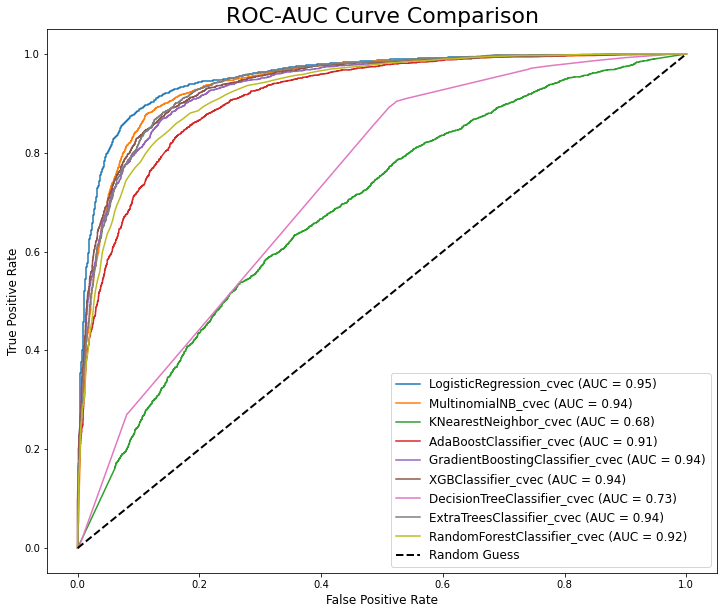

In [93]:
plot_roc(model_dict_cvec)

### ROC AUC Curve (TF-IDF Vectorizer)

In [94]:
# plotting ROC AUC curve for TF-IDF Vectorizer models
model_dict_tvec = {
    lr_tvec: 'LogisticRegression_tvec',
    nb_tvec: 'MultinomialNB_tvec',
    knn_tvec: 'KNearestNeighbor_tvec',
    ada_tvec: 'AdaBoostClassifier_tvec',
    gb_tvec: 'GradientBoostingClassifier_tvec',
    xgb_tvec: 'XGBClassifier_tvec',
    dt_tvec: 'DecisionTreeClassifier_tvec',
    et_tvec: 'ExtraTreesClassifier_tvec',
    rf_tvec: 'RandomForestClassifier_tvec'
    }

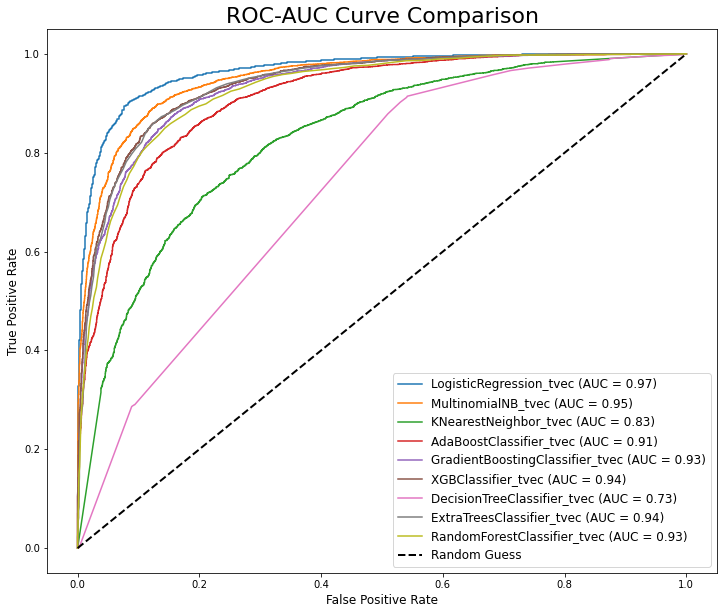

In [95]:
plot_roc(model_dict_tvec)

### Best Model

The best model among all machine learning models tested in this notebook is **Logistic Regression with TF-IDF Vectorizer**.

## Conclusion

To conclude, our best performing machine learning model is the Logistic Regression with TF-IDF vectorizer. It is also our best performing model in the whole project (we were unable to tune our RNN model in time for comparison). It performed above expectations, with test ROC AUC score of 0.9657, accuracy score of 0.9054, and specificity score of 0.8964. All 3 of these scores outperformed all other models. We would recommend the use of this model on other balanced review datasets, such that after training, it would effectively classify sentiment polarities. Following that, reviews and comments from untapped data can be utilized for the improvement of products, or for product promotion.

Future improvements to this project, other than tuning our RNN model, would be to consider using other deep learning models as well. These include models with word2vec embeddings, and pre-trained ones, like BERT.